In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import gc
import glob

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [ ]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [ ]:
# 런타임 다시 시작 후 실행
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/데이터톤/데이터/2324전처리.csv')
data

,id,방문횟수,여행형태,방한목적,고려한_관광활동_1,고려한_관광활동_2,고려한_관광활동_3,고려한_인프라_1,고려한_인프라_2,고려한_인프라_3,...,항목별만족도_trad_culture,항목별만족도_전시관람,항목별만족도_kpop_drama,항목별만족도_performance,항목별만족도_festival,항목별만족도_entertainment,항목별만족도_recreation,항목별만족도_immigration,항목별만족도_language,항목별만족도_safety
0,6,4,1,1,1.0,7.0,2.0,6.0,10.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,4,1,2,3.0,13.0,2.0,3.0,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,2,1,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,3,1,2,2.0,1.0,4.0,3.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,19273,2,1,1,3.0,2.0,1.0,5.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0
32408,19274,2,1,1,12.0,3.0,1.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0
32409,19275,1,1,1,13.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
32410,19277,2,1,1,3.0,2.0,1.0,1.0,5.0,7.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0


In [ ]:
for col in data.columns:
    print(col)

id
방문횟수
여행형태
방한목적
고려한_관광활동_1
고려한_관광활동_2
고려한_관광활동_3
고려한_인프라_1
고려한_인프라_2
고려한_인프라_3
참여_식도락관광
참여_쇼핑
참여_자연경관감상
참여_역사유적지방문
참여_전통문화체험
참여_박물관전시관관람
참여_한류스타관련
참여_공연관람
참여_지역축제
참여_유흥
참여_오락
참여_뷰티미용관광
참여_치료건강검진
참여_스포츠관람
참여_스포츠레포츠참가
참여_국제회의
참여_비즈니스
참여_연수교육연구
참여_기타
만족한활동_1
만족한활동_2
만족한활동_3
방문지역_서울
방문지역_경기
방문지역_인천
방문지역_강원
방문지역_대전
방문지역_충북
방문지역_충남
방문지역_세종
방문지역_경북
방문지역_경남
방문지역_대구
방문지역_울산
방문지역_부산
방문지역_광주
방문지역_전북
방문지역_전남
방문지역_제주
총체재기간(코드형)
총체재기간
1인지출경비
1인1일지출경비
1인지출경비_영향치결측
1인지출경비_상하위1%대체
1인1일지출경비_영향치_61일이상결측
1인1일지출경비_상하위1%대체
1인1일지출경비_상하위1%대체_61일이상결측
형태별_1일지출경비
형태별_1일지출경비_상하위1%대체_61일이상결측
형태별_1일지출경비_항공제외대체결측
항목별지출경비_쇼핑
항목별지출경비_치료
항목별지출경비_미용
항목별지출경비_음식점
항목별지출경비_식음료
항목별지출경비숙박비
항목별지출경비_문화서비스
전반적만족도
항목별만족도_식도락
항목별만족도_쇼핑
항목별만족도_자연경관감상
항목별만족도_뷰티미용관광
항목별만족도_치료건강검진
항목별만족도_스포츠관람
항목별만족도_스포츠레포츠참가
항목별만족도_여행경비
항목별만족도_숙박시설
재방문의사
타인추천의향
월별
분기별
국가별
성별
연령별
방한목적별
방한횟수별
여행형태별
weight
year
참여_휴양휴식웰니스
주요이용숙박시설_1
주요이용숙박시설_2
주요이용숙박시설_3
주요이용숙박시설_4
주요이용숙박시설_5
주요이용숙박시설_6
주요이용숙박시설_7
주요이용숙박시설_8
주요이용숙박시설_9
1인_지출경비_국제교통비제외
1인1일_지출경비_61일이상결

## 데이터 전처리

In [ ]:
print(data['참여_휴양휴식웰니스'].value_counts(dropna=False))
print(data['참여_자연경관감상'].value_counts(dropna=False))
print(data['참여_치료건강검진'].value_counts(dropna=False))
print(data['참여_뷰티미용관광'].value_counts(dropna=False))

참여_휴양휴식웰니스
NaN    29727
4.0     2685
Name: count, dtype: int64
참여_자연경관감상
3.0    18146
NaN    14266
Name: count, dtype: int64
참여_치료건강검진
NaN     30912
14.0      860
13.0      640
Name: count, dtype: int64
참여_뷰티미용관광
NaN     28822
13.0     1970
12.0     1620
Name: count, dtype: int64


In [ ]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_휴양휴식웰니스_이진'] = data['참여_휴양휴식웰니스'].notna().astype(int)

data[['참여_휴양휴식웰니스', '참여_휴양휴식웰니스_이진']].head(10)

print(data['참여_휴양휴식웰니스_이진'].value_counts(dropna=False))

참여_휴양휴식웰니스_이진
0    29727
1     2685
Name: count, dtype: int64


In [ ]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_자연경관감상_이진'] = data['참여_자연경관감상'].notna().astype(int)

data[['참여_자연경관감상', '참여_자연경관감상_이진']].head(10)

print(data['참여_자연경관감상_이진'].value_counts(dropna=False))

참여_자연경관감상_이진
1    18146
0    14266
Name: count, dtype: int64


In [ ]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_치료건강검진_이진'] = data['참여_치료건강검진'].notna().astype(int)

data[['참여_치료건강검진', '참여_치료건강검진_이진']].head(10)

print(data['참여_치료건강검진_이진'].value_counts(dropna=False))

참여_치료건강검진_이진
0    30912
1     1500
Name: count, dtype: int64


In [ ]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_뷰티미용관광_이진'] = data['참여_뷰티미용관광'].notna().astype(int)

data[['참여_뷰티미용관광', '참여_뷰티미용관광_이진']].head(10)

print(data['참여_뷰티미용관광_이진'].value_counts(dropna=False))

참여_뷰티미용관광_이진
0    28822
1     3590
Name: count, dtype: int64


In [ ]:
print(data['참여_식도락관광'].value_counts(dropna=False))
print(data['참여_쇼핑'].value_counts(dropna=False))

참여_식도락관광
1.0    23477
NaN     8935
Name: count, dtype: int64
참여_쇼핑
2.0    25800
NaN     6612
Name: count, dtype: int64


In [ ]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_식도락관광_이진'] = data['참여_식도락관광'].notna().astype(int)

data[['참여_식도락관광', '참여_식도락관광_이진']].head(10)

print(data['참여_식도락관광_이진'].value_counts(dropna=False))

참여_식도락관광_이진
1    23477
0     8935
Name: count, dtype: int64


In [ ]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_쇼핑_이진'] = data['참여_쇼핑'].notna().astype(int)

data[['참여_쇼핑', '참여_쇼핑_이진']].head(10)

print(data['참여_쇼핑_이진'].value_counts(dropna=False))

참여_쇼핑_이진
1    25800
0     6612
Name: count, dtype: int64


In [ ]:
print(data['총체재기간'].value_counts(dropna=False))

총체재기간
5     5891
4     4730
6     3739
3     3362
7     2936
      ... 
52       3
49       3
79       3
54       3
75       3
Name: count, Length: 91, dtype: int64


In [ ]:
print(data['총체재기간(코드형)'].value_counts(dropna=False))

총체재기간(코드형)
2     8550
4     5449
3     4114
5     3660
11    2687
6     1968
1     1869
7     1388
8      967
12     867
10     465
9      428
Name: count, dtype: int64


- 1 : 1~3일
- 2 : 4~7일
- 3 : 8~10일
- 4 : 11~30일
- 5 : 31~60일
- 12 : 61일 이상

###가설
- H₀ (귀무가설): 두 그룹 간 총 체재기간의 차이는 없다.

- H₁ (대립가설): 웰니스 관광 요소에 참여한 해외 관광객은 식도락/쇼핑 관광객보다 총체재기간이 유의하게 길다.(단측검정)

In [ ]:
# 그룹 정의
# 웰니스 관광 참여 여부 (4개 중 하나라도 참여했으면 True)
data['웰니스참여'] = data[['참여_자연경관감상_이진', '참여_휴양휴식웰니스_이진',
                     '참여_치료건강검진_이진', '참여_뷰티미용관광_이진']].any(axis=1)

# 식도락/쇼핑 관광 참여 여부 (2개 중 하나라도 참여했으면 True)
data['식도락_쇼핑_참여'] = data[['참여_쇼핑_이진', '참여_식도락관광_이진']].any(axis=1)


In [ ]:
# 각 그룹 추출
# 웰니스 관광 참여자
wellness_group = data[data['웰니스참여']]['총체재기간']

# 식도락/쇼핑 관광 참여자
food_shopping_group = data[data['식도락_쇼핑_참여']]['총체재기간']

In [ ]:
# 정규성 검정(Shapiro-Wilk Test)
# p< 0.05라면 정규성 기각 -> 비모수 검정 (Mann-Whitney U)사용.
from scipy.stats import shapiro

shapiro_w = shapiro(wellness_group.sample(n=5000, random_state=1))  # 샘플 수가 많아 오류 방지
shapiro_f = shapiro(food_shopping_group.sample(n=5000, random_state=1))

print("웰니스 정규성 p값:", shapiro_w.pvalue)
print("식도락/쇼핑 정규성 p값:", shapiro_f.pvalue)

웰니스 정규성 p값: 2.6127786900892886e-80
식도락/쇼핑 정규성 p값: 6.626511030510447e-81


### 정규성 검정(Shapiro-Wilk) 결과


- 귀무가설 : 데이터는 정규분포를 따른다.
- 대립가설 : 데이터는 정규분포를 따르지 않는다.

웰니스 관광객 체류기간의 정규성 검정 p값: 2.61e-80

식도락/쇼핑 관광객 체류기간의 정규성 검정 p값: 6.63e-81

1. 두 그룹 모두 p-val가 0.05보다 훨씬 작다 -> 귀무가설 기각
2. 따라서, 웰니스 관광객과 식도락/쇼핑 관광객의 총 체재기간 분포는 정규분포를
따르지 않는다고 볼 수 있음
3. 정규성을 만족하지 않으므로, 두 그룹의 평균 비교에는 비모수 검정을 쓰려함
-> 독립된 두 집단 간의 중앙값 차이 비교에 적합하고, 정규성 가정을 하지 않는 Man-Whitney U test
(U검정) 실시


In [ ]:
from scipy.stats import mannwhitneyu

# alternative='greater': 웰니스 > 식도락/쇼핑 가설 (단측)
stat, p = mannwhitneyu(wellness_group, food_shopping_group, alternative='greater')

print("Mann-Whitney U 검정 통계량:", stat)
print("p-value:", p)

Mann-Whitney U 검정 통계량: 328316381.5
p-value: 3.471675585634601e-38


### 결과분석
- Mann-Whitney U 검정 통계량:328316381.5
- p-value: 3.471675585634601e-38

- 단측검정으로 alternative='greater'를 설정
- p-val가 0,05보다 훨씬 작으므로, 귀무가설(두 그룹 간 체류기간이 차이가 없다)를 기각함
- 따라서, 웰니스 관광 요소에 참여한 해외 관광객의 총 체재기간이 식도락/쇼핑 관광객보다
통계적으로 유의하게 길다고 결론

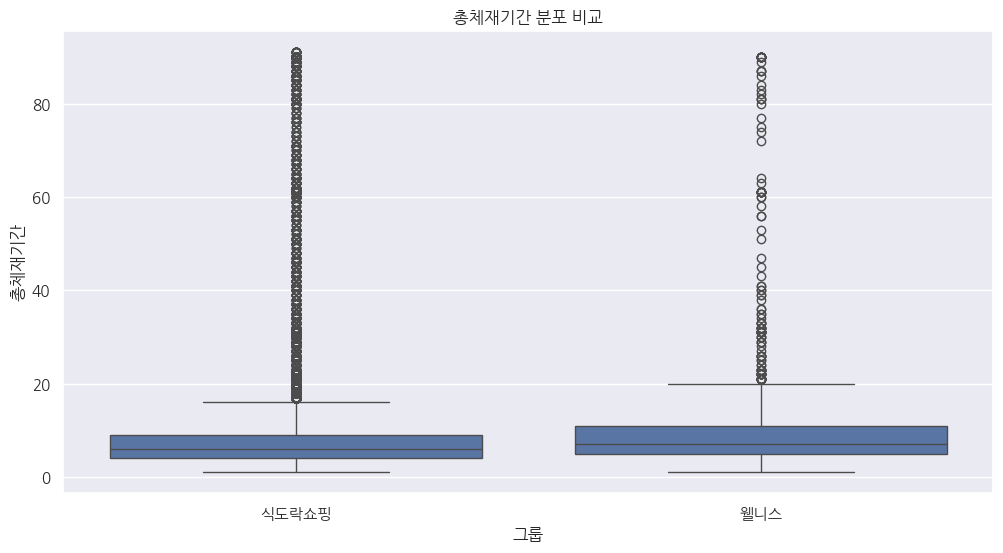

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# '웰니스' 참여 여부 기준으로 그룹 컬럼 만들기
data['그룹'] = '기타'

# 웰니스 관광요소 하나라도 참여한 사람: '웰니스'
wellness_condition = (
    (data['참여_자연경관감상_이진'] == 1) |
    (data['참여_휴양휴식웰니스_이진'] == 1) |
    (data['참여_치료건강검진_이진'] == 1) |
    (data['참여_뷰티미용관광_이진'] == 1)
)
data.loc[wellness_condition, '그룹'] = '웰니스'

# 식도락/쇼핑 참여한 사람: '식도락쇼핑'
foodshopping_condition = (
    (data['참여_쇼핑_이진'] == 1) |
    (data['참여_식도락관광_이진'] == 1)
)
data.loc[foodshopping_condition, '그룹'] = '식도락쇼핑'

# 시각화
sns.boxplot(x='그룹', y='총체재기간', data=data[data['그룹'].isin(['웰니스', '식도락쇼핑'])])
plt.title('총체재기간 분포 비교')
plt.show()

In [ ]:
# 그룹별로 총체재기간에 대한 기술통계 확인
summary = data[data['그룹'].isin(['웰니스', '식도락쇼핑'])].groupby('그룹')['총체재기간'].describe()
print(summary)

         count       mean        std  min  25%  50%   75%   max
그룹                                                             
식도락쇼핑  29152.0  10.022434  13.486520  1.0  4.0  6.0   9.0  91.0
웰니스     1286.0  11.148523  14.238017  1.0  5.0  7.0  11.0  90.0


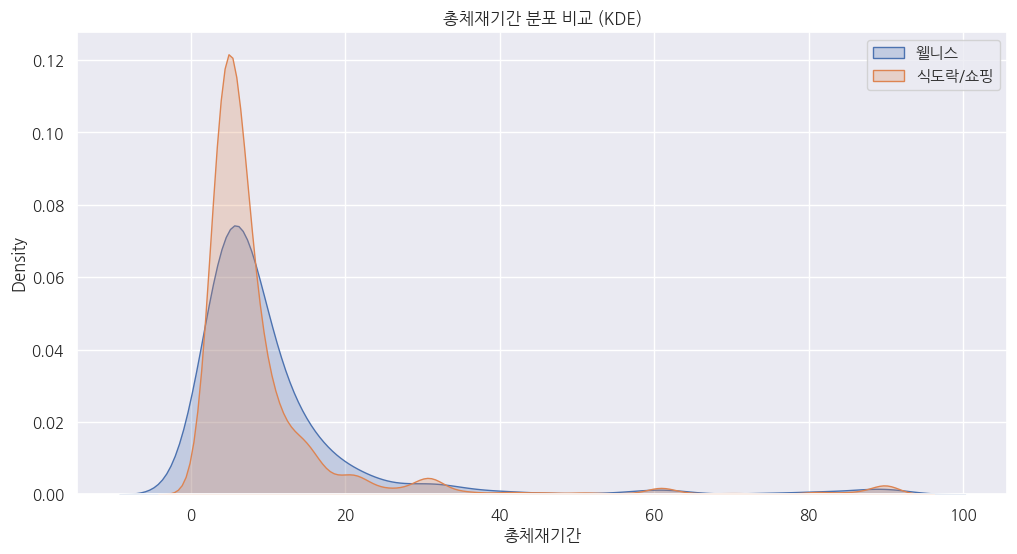

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.kdeplot(data=data[data['그룹']=='웰니스'], x='총체재기간', label='웰니스', fill=True)
sns.kdeplot(data=data[data['그룹']=='식도락쇼핑'], x='총체재기간', label='식도락/쇼핑', fill=True)
plt.title('총체재기간 분포 비교 (KDE)')
plt.legend()
plt.show()

### 가설1을 완전히 배타적인 두 그룹으로 분리 하였을 때

In [ ]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu

# 1. 웰니스/식도락·쇼핑 참여 여부 이진 변수 생성
data['웰니스참여'] = data[['참여_자연경관감상_이진', '참여_휴양휴식웰니스_이진',
                       '참여_치료건강검진_이진', '참여_뷰티미용관광_이진']].any(axis=1)

data['식도락_쇼핑_참여'] = data[['참여_쇼핑_이진', '참여_식도락관광_이진']].any(axis=1)

# 2. 배타적 그룹 정의
# 웰니스 Only 그룹: 웰니스 참여는 했지만, 식도락/쇼핑은 하지 않은 경우
wellness_only = data[(data['웰니스참여']) & (~data['식도락_쇼핑_참여'])]['총체재기간']

# 식도락/쇼핑 Only 그룹: 식도락/쇼핑 참여는 했지만, 웰니스는 하지 않은 경우
food_shopping_only = data[(data['식도락_쇼핑_참여']) & (~data['웰니스참여'])]['총체재기간']

# 3. 각 그룹 정규성 검정 (샘플링하여 Shapiro-Wilk test)
sample_n = 5000  # 많으면 에러날 수 있어서 샘플링

# 그룹 크기 확인 후 샘플 수 조정
sample_w = min(sample_n, len(wellness_only))
sample_f = min(sample_n, len(food_shopping_only))

shapiro_w = shapiro(wellness_only.sample(n=sample_w, random_state=1))
shapiro_f = shapiro(food_shopping_only.sample(n=sample_f, random_state=1))

print("웰니스 Only 정규성 p값:", shapiro_w.pvalue)
print("식도락/쇼핑 Only 정규성 p값:", shapiro_f.pvalue)

# 4. 정규성 기각 시 Mann-Whitney U-test 수행
if shapiro_w.pvalue < 0.05 or shapiro_f.pvalue < 0.05:
    print("비모수 검정(Mann-Whitney U-test) 수행:")
    stat, p = mannwhitneyu(wellness_only, food_shopping_only, alternative='two-sided')
    print("U검정 통계량:", stat)
    print("p-value:", p)
else:
    print("정규성 만족 시 정규분포 기반 t-test 수행 권장 ")

웰니스 Only 정규성 p값: 3.9346235133471337e-50
식도락/쇼핑 Only 정규성 p값: 7.78232697547564e-83
비모수 검정(Mann-Whitney U-test) 수행:
U검정 통계량: 7324378.5
p-value: 8.5910772481619e-39


In [ ]:
# 1. 기술통계 요약표 출력
group_data = {
    '웰니스 Only': wellness_only,
    '식도락/쇼핑 Only': food_shopping_only
}

summary_df = pd.DataFrame({
    group: {
        'count': len(vals),
        'mean': vals.mean(),
        'std': vals.std(),
        '25%': vals.quantile(0.25),
        '50% (중앙값)': vals.median(),
        '75%': vals.quantile(0.75),
        'max': vals.max()
    } for group, vals in group_data.items()
}).T

print("📊 기술통계 요약:")
print(summary_df)

📊 기술통계 요약:
              count       mean        std  25%  50% (중앙값)   75%   max
웰니스 Only     1286.0  11.148523  14.238017  5.0        7.0  11.0  90.0
식도락/쇼핑 Only  9322.0   8.526389  11.922343  4.0        5.0   8.0  91.0


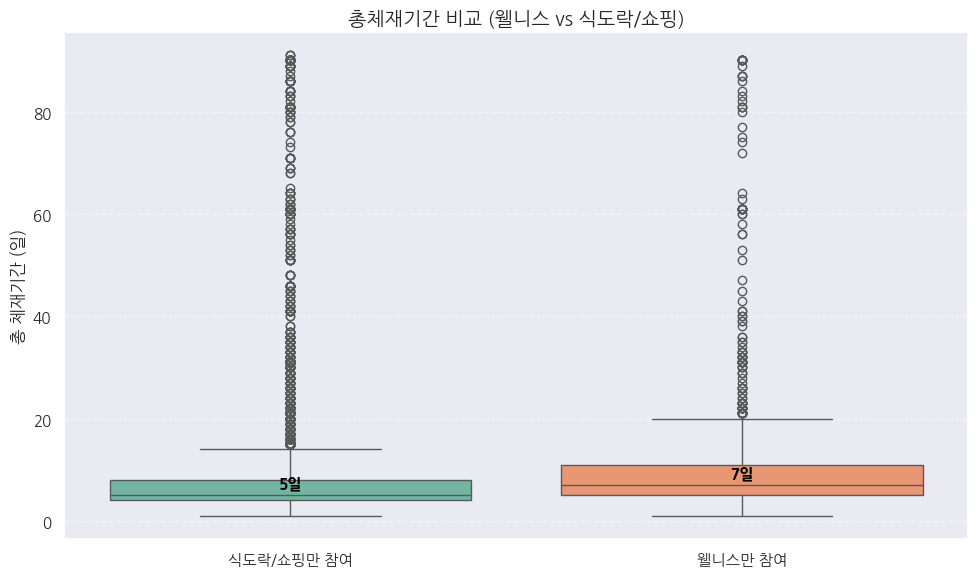

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 시각화를 위한 데이터 준비
wellness_df = wellness_only.to_frame(name='총체재기간')
wellness_df['그룹'] = '웰니스만 참여'

food_df = food_shopping_only.to_frame(name='총체재기간')
food_df['그룹'] = '식도락/쇼핑만 참여'

plot_df = pd.concat([food_df, wellness_df])  # 순서: 식도락/쇼핑 -> 웰니스

# 2. 중앙값 수동 지정 (정수형으로)
medians = {
    '식도락/쇼핑만 참여': int(food_shopping_only.median()),
    '웰니스만 참여': int(wellness_only.median())
}

# 3. 색상 지정
palette='Set2'

# 4. Boxplot 시각화
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=plot_df, x='그룹', y='총체재기간', palette=palette)

plt.title('총체재기간 비교 (웰니스 vs 식도락/쇼핑)', fontsize=14)
plt.ylabel('총 체재기간 (일)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 5. 중앙값 텍스트 추가
for i, group in enumerate(['식도락/쇼핑만 참여', '웰니스만 참여']):
    median_val = medians[group]
    ax.text(i, median_val + 1, f'{median_val}일',
            ha='center', va='bottom', fontsize=11, weight='bold', color='black')

plt.tight_layout()
plt.show()

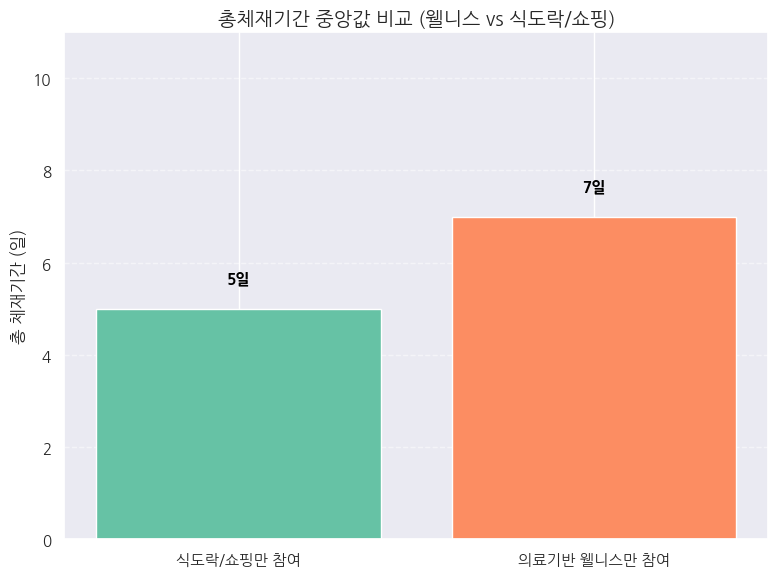

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 시각화를 위한 데이터 준비
wellness_df = wellness_only.to_frame(name='총체재기간')
wellness_df['그룹'] = '의료기반 웰니스만 참여'

food_df = food_shopping_only.to_frame(name='총체재기간')
food_df['그룹'] = '식도락/쇼핑만 참여'

plot_df = pd.concat([food_df, wellness_df])  # 순서: 식도락/쇼핑 -> 웰니스

# 2. 중앙값 수동 지정 (정수형으로)
medians = {
    '식도락/쇼핑만 참여': int(food_shopping_only.median()),
    '의료기반 웰니스만 참여': int(wellness_only.median())
}

# 3. 색상 지정
palette = sns.color_palette('Set2')

# 4. 막대그래프 시각화 (중앙값 기준)
plt.figure(figsize=(8, 6))
groups = ['식도락/쇼핑만 참여', '의료기반 웰니스만 참여']
median_values = [medians[group] for group in groups]

bars = plt.bar(groups, median_values, color=palette)

plt.title('총체재기간 중앙값 비교 (웰니스 vs 식도락/쇼핑)', fontsize=14)
plt.ylabel('총 체재기간 (일)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# y축 범위 여유 있게 설정 (최대 중앙값 + 4일 정도 여유)
max_median = max(median_values)
plt.ylim(0, max_median + 4)

# 5. 중앙값 텍스트 추가
for bar, median_val in zip(bars, median_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f'{median_val}일', ha='center', va='bottom', fontsize=11, weight='bold', color='black')

plt.tight_layout()
plt.show()

### 가설2
- H0: 웰니스 관광객과 식도락/쇼핑 관광객의 소비금액(소비수준)에 차이가 없다.

- H1: 웰니스 관광객의 소비금액이 더 높다.

In [ ]:
print(data['1인1일지출경비'].value_counts(dropna=False))

1인1일지출경비
NaN        867
1687.50    163
1760.79    162
25.29      100
500.00      82
          ... 
123.57       1
95.25        1
266.02       1
113.59       1
198.27       1
Name: count, Length: 18264, dtype: int64


In [ ]:
print(data['1인1일지출경비'].isnull().sum())

# 결측치 제거
data = data.dropna(subset=['1인1일지출경비'])

867


In [ ]:
print(data['1인1일지출경비'].isnull().sum())

0


In [ ]:
# 웰니스 관광 참여자 중 식도락/쇼핑은 제외한 그룹
wellness_group = data[(data['웰니스참여'] == True) & (data['식도락_쇼핑_참여'] == False)]

# 식도락/쇼핑 관광 참여자 중 웰니스는 제외한 그룹
shop_food_group = data[(data['식도락_쇼핑_참여'] == True) & (data['웰니스참여'] == False)]

In [ ]:
# 필요한 변수만 추출해서 결측치 제거
wellness_expense = wellness_group['1인1일지출경비'].dropna()
shop_food_expense = shop_food_group['1인1일지출경비'].dropna()

In [ ]:
from scipy.stats import shapiro

# 정규성 검정
shapiro_wellness = shapiro(wellness_expense)
shapiro_shopfood = shapiro(shop_food_expense)

print("웰니스 그룹 정규성 p-value:", shapiro_wellness.pvalue)
print("식도락/쇼핑 그룹 정규성 p-value:", shapiro_shopfood.pvalue)

웰니스 그룹 정규성 p-value: 9.48136265803561e-41
식도락/쇼핑 그룹 정규성 p-value: 9.518591186943125e-80


### 정규성 검정 결과
- 두 그룹 모두 정규분포를 따르지 않으므로
비모수 검정 필요

In [ ]:
from scipy.stats import levene

levene_test = levene(wellness_expense, shop_food_expense)
print("등분산성 검정 p-value:", levene_test.pvalue)

등분산성 검정 p-value: 0.009487082147080187


### 등분산성 검정 결과
- 등분산성 충족 하지 않음

-> 정규성도, 등분산성도 모두 충족되지 않으므로
독립인 두 집단의 비모수 검정 : Mann-Whitney U Test 수행

In [ ]:
from scipy.stats import mannwhitneyu

u_result = mannwhitneyu(
    wellness_expense,
    shop_food_expense,
    alternative='greater'  # 단측검정: wellness > shop/food
)

print("Mann-Whitney U-test p-value:", u_result.pvalue)

Mann-Whitney U-test p-value: 0.9999963842825715


In [ ]:
from scipy.stats import mannwhitneyu

# 두 그룹의 1인1일지출경비 값 추출
wellness = data.loc[data['웰니스참여'], '1인1일지출경비']
food_shopping = data.loc[data['식도락_쇼핑_참여'], '1인1일지출경비']

# Mann-Whitney U Test (양측 검정)
stat, p = mannwhitneyu(wellness, food_shopping, alternative='greater')

print(f"Mann-Whitney U 통계량: {stat:.4f}")
print(f"p-value: {p:.4f}")

Mann-Whitney U 통계량: 283031566.0000
p-value: 1.0000


### 가설검정 결과 분석
- p-value = 1.0000 매우 높은 값으로 귀무가설 기각 불가(..)

- 추가 해석 또는 점검 사항
1. 두 그룹 간 소비패턴이 실제로 유사한가?
- 웰니스 관광이 체류기간은 길어질 수 있으나, 1일당 지출은 쇼핑보다 낮을 수도 있음.
- 쇼핑 관광은 하루에 큰 금액을 쓰는 경우도 많음 (면세점, 고가 제품 등).

2. 이진 분류 그룹 간 겹침 여부 확인:
- 한 사람이 웰니스도 하고 쇼핑도 했다면, 그룹 분리가 제대로 안 되었을 수 있음

3. 표본 수 확인:
- 두 그룹의 샘플 수 차이가 극단적으로 크면 Mann-Whitney 검정이 민감할 수 있

### 서로 배타적인 그룹 (식도락/쇼핑만 참여 vs 웰니스만 참여) 로 다시 실행

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# 1. 배타적인 그룹 만들기
wellness_only = data[(data['웰니스참여'] == True) & (data['식도락_쇼핑_참여'] == False)]
shop_food_only = data[(data['웰니스참여'] == False) & (data['식도락_쇼핑_참여'] == True)]

# 2. 지출경비 데이터 추출
x = wellness_only['1인1일지출경비'].dropna()
y = shop_food_only['1인1일지출경비'].dropna()

# 3. 그룹별 샘플 수 확인
print(f"웰니스만 참여 인원 수: {len(x)}")
print(f"식도락/쇼핑만 참여 인원 수: {len(y)}")

# 4. Mann-Whitney U 검정
stat, p = mannwhitneyu(x, y, alternative='greater')

# 5. 결과 출력
print(f"Mann-Whitney U 통계량: {stat:.4f}")
print(f"p-value: {p:.4f}")

웰니스만 참여 인원 수: 1247
식도락/쇼핑만 참여 인원 수: 9140
Mann-Whitney U 통계량: 5253119.5000
p-value: 1.0000


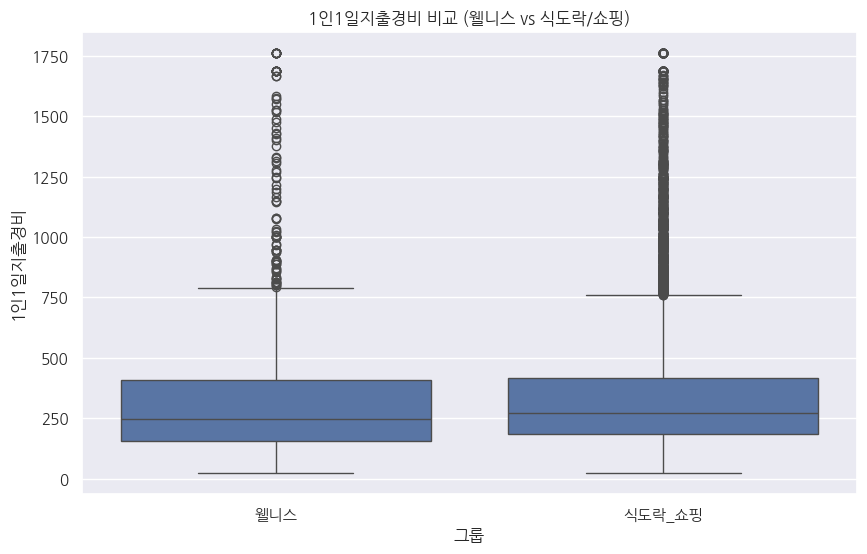

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 배타적 그룹에 label 붙이기
wellness_only['그룹'] = '웰니스'
shop_food_only['그룹'] = '식도락_쇼핑'

# 병합
plot_df = pd.concat([wellness_only, shop_food_only])

plt.figure(figsize=(10, 6))
sns.boxplot(x='그룹', y='1인1일지출경비', data=plot_df)
plt.title('1인1일지출경비 비교 (웰니스 vs 식도락/쇼핑)')
plt.show()

In [ ]:
# 웰니스만 참여한 그룹 필터링
wellness_only = data[(data['웰니스참여'] == True) & (data['식도락_쇼핑_참여'] == False)]

# 식도락/쇼핑만 참여한 그룹 필터링
foodshopping_only = data[(data['웰니스참여'] == False) & (data['식도락_쇼핑_참여'] == True)]

# 통계량 출력
import pandas as pd

summary_df = pd.DataFrame({
    '그룹': ['웰니스만 참여', '식도락/쇼핑만 참여'],
    '평균': [wellness_only['1인1일지출경비'].mean(), foodshopping_only['1인1일지출경비'].mean()],
    '중앙값': [wellness_only['1인1일지출경비'].median(), foodshopping_only['1인1일지출경비'].median()]
})

print(summary_df)

           그룹          평균      중앙값
0     웰니스만 참여  346.834010  246.000
1  식도락/쇼핑만 참여  355.141293  270.435


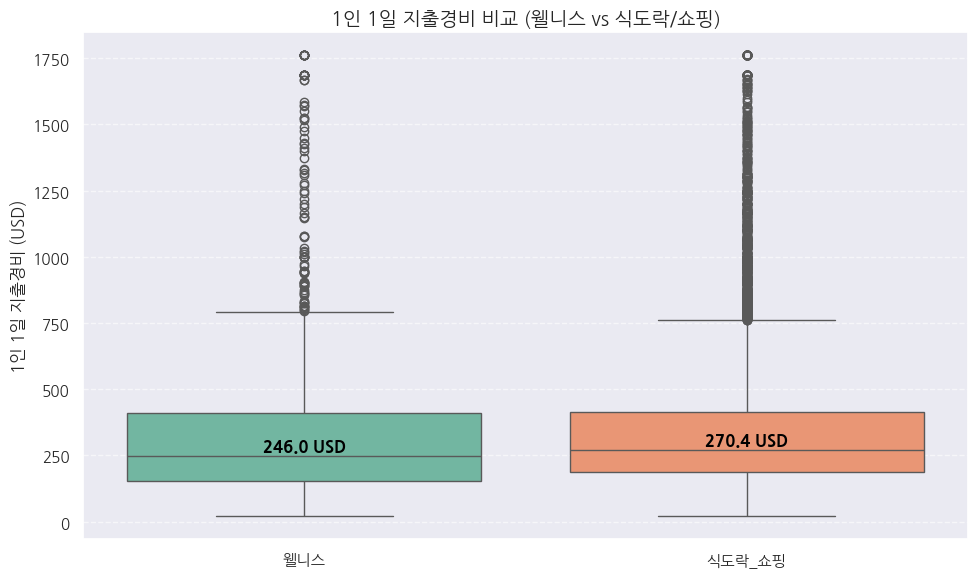

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 배타적 그룹에 label 붙이기
wellness_only['그룹'] = '웰니스'
shop_food_only['그룹'] = '식도락_쇼핑'

# 병합
plot_df = pd.concat([wellness_only, shop_food_only])

# 중앙값 수동 지정
medians = {
    '웰니스': 246.000,
    '식도락_쇼핑': 270.435
}

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='그룹', y='1인1일지출경비', data=plot_df, palette='Set2')
plt.title('1인 1일 지출경비 비교 (웰니스 vs 식도락/쇼핑)', fontsize=14)
plt.ylabel('1인 1일 지출경비 (USD)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 중앙값 표시 (수동 입력 기반)
for i, group in enumerate(['웰니스', '식도락_쇼핑']):
    median_val = medians[group]
    ax.text(i, median_val + 5, f'{median_val:.1f} USD',
            ha='center', va='bottom', fontsize=12, weight='bold', color='black')

plt.tight_layout()
plt.show()

In [ ]:
# 1. 기술통계 계산 함수
def describe_group(series):
    return {
        'count': len(series),
        'mean': series.mean(),
        'std': series.std(),
        'min': series.min(),
        '25%': series.quantile(0.25),
        '50% (중앙값)': series.median(),
        '75%': series.quantile(0.75),
        'max': series.max()
    }

# 2. 각 그룹별 기술통계 계산
wellness_stats = describe_group(x)
shop_food_stats = describe_group(y)

# 3. 데이터프레임으로 보기 좋게 정리
summary_df = pd.DataFrame({
    '웰니스만 참여': wellness_stats,
    '식도락/쇼핑만 참여': shop_food_stats
})

print("📊 1인1일지출경비 - 그룹별 기술통계 요약:")
print(summary_df)

📊 1인1일지출경비 - 그룹별 기술통계 요약:
               웰니스만 참여   식도락/쇼핑만 참여
count      1247.000000  9140.000000
mean        346.834010   355.141293
std         319.327644   289.309054
min          22.000000    22.000000
25%         154.465000   185.930000
50% (중앙값)   246.000000   270.435000
75%         409.190000   415.647500
max        1760.790000  1760.790000


### 가설2
### 총지출기준

In [ ]:
# 웰니스 참여 여부 (4개 중 하나라도 참여)
data['의료기반 웰니스참여'] = data[['참여_자연경관감상_이진', '참여_휴양휴식웰니스_이진',
                     '참여_치료건강검진_이진', '참여_뷰티미용관광_이진']].any(axis=1).astype(int)

# 식도락/쇼핑 참여 여부 (2개 중 하나라도 참여)
data['식도락_쇼핑_참여'] = data[['참여_쇼핑_이진', '참여_식도락관광_이진']].any(axis=1).astype(int)

# 배타적 그룹: 웰니스만 참여 = 1, 식도락/쇼핑만 참여 = 0, 둘 다 참여하면 제외
condition_wellness_only = (data['의료기반 웰니스참여'] == 1) & (data['식도락_쇼핑_참여'] == 0)
condition_foodshopping_only = (data['의료기반 웰니스참여'] == 0) & (data['식도락_쇼핑_참여'] == 1)

data_filtered = data[condition_wellness_only | condition_foodshopping_only].copy()
data_filtered['그룹'] = data_filtered['의료기반 웰니스참여'].map({1: '의료기반 웰니스만 참여', 0: '식도락/쇼핑만 참여'})

In [ ]:
# 결측치 확인
print(data_filtered['1인지출경비'].isnull().sum())

# 결측치 제거
data_filtered = data_filtered.dropna(subset=['1인지출경비'])

# 그룹별 데이터 수 확인
print(data_filtered['그룹'].value_counts())

0
그룹
식도락/쇼핑만 참여      9322
의료기반 웰니스만 참여    1286
Name: count, dtype: int64


In [ ]:
from scipy.stats import shapiro

for group in ['의료기반 웰니스만 참여', '식도락/쇼핑만 참여']:
    stat, p = shapiro(data_filtered[data_filtered['그룹'] == group]['1인지출경비'])
    print(f"{group} 정규성 검정 p-value: {p:.5f}")

의료기반 웰니스만 참여 정규성 검정 p-value: 0.00000
식도락/쇼핑만 참여 정규성 검정 p-value: 0.00000


In [ ]:
from scipy.stats import levene

group1 = data_filtered[data_filtered['그룹'] == '의료기반 웰니스만 참여']['1인지출경비']
group2 = data_filtered[data_filtered['그룹'] == '식도락/쇼핑만 참여']['1인지출경비']

stat, p = levene(group1, group2)
print(f"등분산성 검정 p-value: {p:.5f}")

등분산성 검정 p-value: 0.00001


In [ ]:
from scipy.stats import mannwhitneyu

# 그룹별로 총지출 데이터 추출
wellness_only = data_filtered[data_filtered['그룹'] == '의료기반 웰니스만 참여']['1인지출경비']
foodshopping_only = data_filtered[data_filtered['그룹'] == '식도락/쇼핑만 참여']['1인지출경비']

# Mann-Whitney U 검정 (단측: 웰니스만 참여 > 식도락/쇼핑만 참여)
stat, p = mannwhitneyu(wellness_only, foodshopping_only, alternative='greater')

print(f"Mann-Whitney U 통계량: {stat:.4f}")
print(f"p-value: {p:.5f}")

Mann-Whitney U 통계량: 6717160.5000
p-value: 0.00000


In [ ]:
# 그룹별 기술 통계 요약 (1인 지출경비)
group_stats = data_filtered.groupby('그룹')['1인지출경비'].agg(['count', 'mean', 'std', 'min', 'median', 'max', 'quantile']).reset_index()

# 분위수 별도 추가
group_stats['Q1 (25%)'] = data_filtered.groupby('그룹')['1인지출경비'].quantile(0.25).values
group_stats['Q2 (중앙값)'] = data_filtered.groupby('그룹')['1인지출경비'].quantile(0.50).values
group_stats['Q3 (75%)'] = data_filtered.groupby('그룹')['1인지출경비'].quantile(0.75).values

# 열 정리
group_stats = group_stats[['그룹', 'count', 'mean', 'std', 'Q1 (25%)', 'Q2 (중앙값)', 'Q3 (75%)', 'max']]
group_stats.columns = ['그룹', 'n', '평균 (USD)', '표준편차', 'Q1 (25%)', 'Q2 (중앙값)', 'Q3 (75%)', '최대값']

# 결과 출력
print(group_stats)

           그룹     n     평균 (USD)         표준편차  Q1 (25%)  Q2 (중앙값)   Q3 (75%)  \
0  식도락/쇼핑만 참여  9322  2122.719014  1808.330135    960.00  1567.875  2607.6675   
1     웰니스만 참여  1286  2462.264914  2000.938003   1125.81  1950.000  3072.7000   

       최대값  
0  12072.5  
1  12072.5  


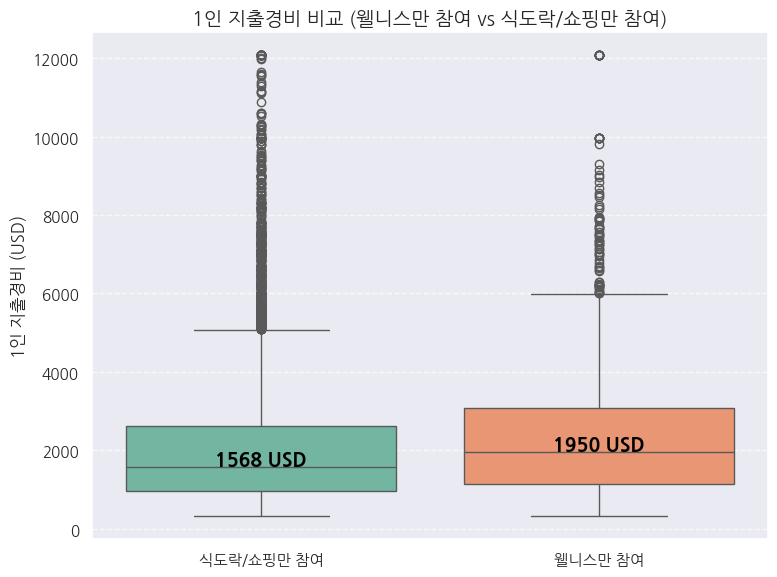

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 박스플롯 생성
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=data_filtered, x='그룹', y='1인지출경비', palette='Set2')
plt.title('1인 지출경비 비교 (웰니스만 참여 vs 식도락/쇼핑만 참여)', fontsize=14)
plt.ylabel('1인 지출경비 (USD)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 그룹의 중위값 계산
medians = data_filtered.groupby('그룹')['1인지출경비'].median()

# 박스플롯 상의 x축 tick 위치 가져오기
xticks = ax.get_xticks()

# 각 중위값 위치에 텍스트 표시
for i, tick in enumerate(xticks):
    group_name = ax.get_xticklabels()[i].get_text()
    median_val = medians[group_name]
    ax.text(tick, median_val + 50, f'{median_val:.0f} USD',
            horizontalalignment='center', color='black', weight='bold')

plt.tight_layout()
plt.show()

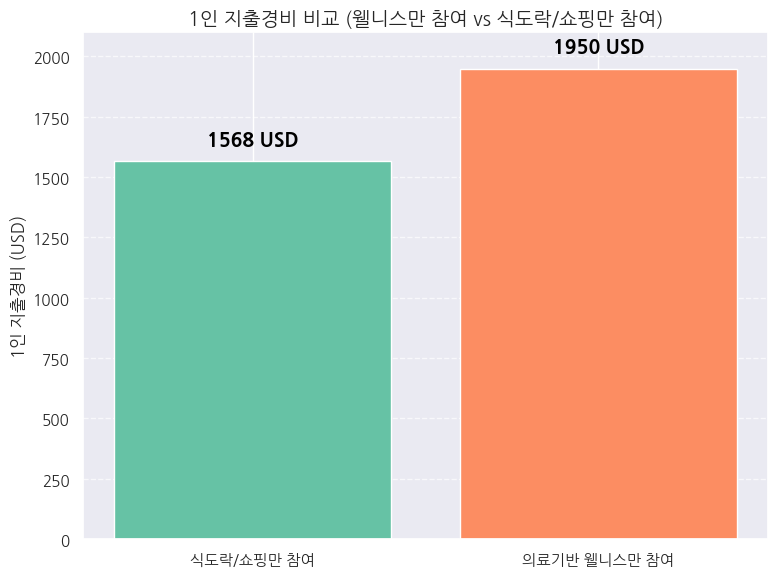

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 그룹의 중위값 계산
medians = data_filtered.groupby('그룹')['1인지출경비'].median()

# 그룹명과 중앙값 리스트 생성
groups = medians.index.tolist()
median_values = medians.values

# 색상 지정
palette = sns.color_palette('Set2', n_colors=len(groups))

# 막대그래프 그리기
plt.figure(figsize=(8, 6))
bars = plt.bar(groups, median_values, color=palette)

plt.title('1인 지출경비 비교 (웰니스만 참여 vs 식도락/쇼핑만 참여)', fontsize=14)
plt.ylabel('1인 지출경비 (USD)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# y축 범위 넉넉하게 설정 (최대 중앙값 + 150 정도 여유)
max_median = median_values.max()
plt.ylim(0, max_median + 150)

# 막대 위에 중앙값 텍스트 표시
for bar, median_val in zip(bars, median_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50,
             f'{median_val:.0f} USD', ha='center', va='bottom', color='black', weight='bold')

plt.tight_layout()
plt.show()

In [ ]:
data_filtered.groupby('그룹')['1인지출경비'].median()

,1인지출경비
그룹,
식도락/쇼핑만 참여,1545.00
웰니스만 참여,1915.16


In [ ]:
import numpy as np
import itertools
from scipy.stats import mannwhitneyu

# 두 그룹 데이터 추출
group1 = data_filtered[data_filtered['그룹'] == '웰니스만 참여']['1인지출경비'].values
group2 = data_filtered[data_filtered['그룹'] == '식도락/쇼핑만 참여']['1인지출경비'].values

### 1. Cliff's Delta 계산
def cliffs_delta(x, y):
    nx = len(x)
    ny = len(y)
    greater = 0
    lower = 0
    for xi in x:
        for yj in y:
            if xi > yj:
                greater += 1
            elif xi < yj:
                lower += 1
    delta = (greater - lower) / (nx * ny)
    return delta

delta = cliffs_delta(group1, group2)
print(f"Cliff’s delta: {delta:.4f}")

### 2. Hodges-Lehmann Estimator 계산
# 모든 조합의 차이 계산
differences = [x - y for x, y in itertools.product(group1, group2)]
hl_estimate = np.median(differences)
print(f"Hodges-Lehmann 추정치 (중앙값 차이): {hl_estimate:.2f}")

Cliff’s delta: 0.1191
Hodges-Lehmann 추정치 (중앙값 차이): 231.79


1. Cliff’s Delta: 0.1191
- 관측치의 약 **56%**는 웰니스 그룹이 식도락/쇼핑 그룹보다 더 높은 지출을 보였다는 의미
- 통계적으로 유의미한 차이는 있지만, 그 차이는 작다.

2. Hodges-Lehmann 추정치 (중앙값 차이): 231.79
- 두 그룹 간 가능한 모든 쌍의 차이를 계산해서, 그 중앙값(median)을 구한 것
- "웰니스 그룹의 지출이 평균적으로 상대 그룹보다 231.79원 더 많다
- 이 역시도 작은 효과에 해당하는 차이로 해석됨 (차이는 존재한다!)

#### 종합결론
- 웰니스 관광 참여자는 식도락/쇼핑 참여자에 비해 의미 있게 더 많은 총지출을 하긴한다.
- 하지만 그 차이가 작다


## 1인1일 지출경비와 1인지출경비(총지출경비) 결과 차이 분석
1. 체류일 수의 영향
- 1인1일지출경비는 지출액을 체류일수로 나눈 값이기 때문에, 체류일이 긴 사람일수록 1일 평균이 낮아지는 경향이 있음
- 웰니스 관광은 상대적으로 장기 체류 성격이 있음. 결과적으로, 웰니스 관광객이 실제로 총액은 더 썼는데도 1일 평균은 낮아질 수 있다.

2. 분산 구조의 차이
- 1인1일지출경비는 분포가 상대적으로 평탄하고 중앙값에 몰리는 경향이 강한 반면,
총지출경비는 고가의 지출(고급 리조트, 패키지 프로그램 등)이 일부 존재할 수 있어 우측으로 긴 분포(positive skew)를 가진다
- 그래서 총지출에서는 유의한 차이가 나타나고, 1일 단위 지출에서는 희석되었을 가능성

3. 실제 소비 구조의 차이
- 웰니스 관광은 '한 번에 고액 지출'을 할 가능성 높음(예: 스파 프로그램, 건강검진 패키지 등)
- 반면 식도락/쇼핑은 '짧은 기간 다회성 소액 지출'이 많아서 일일 평균은 높지만 총액은 낮을 수 있음

In [ ]:
data[['1인1일지출경비', '1인지출경비']].describe()

,1인1일지출경비,1인지출경비
count,31545.000000,31545.000000
mean,332.544634,2170.675846
std,272.783720,1748.408701
min,22.000000,325.580000
25%,177.250000,1028.800000
50%,258.000000,1656.050000
75%,386.170000,2707.500000
max,1760.790000,12072.500000


In [ ]:
from scipy.stats import skew, kurtosis

skew_1일 = skew(data['1인1일지출경비'].dropna())
skew_총액 = skew(data['1인지출경비'].dropna())

kurt_1일 = kurtosis(data['1인1일지출경비'].dropna())
kurt_총액 = kurtosis(data['1인지출경비'].dropna())

print(f"1인1일지출경비 왜도: {skew_1일:.2f}, 첨도: {kurt_1일:.2f}")
print(f"1인지출경비 왜도: {skew_총액:.2f}, 첨도: {kurt_총액:.2f}")

1인1일지출경비 왜도: 2.68, 첨도: 9.07
1인지출경비 왜도: 2.42, 첨도: 7.98


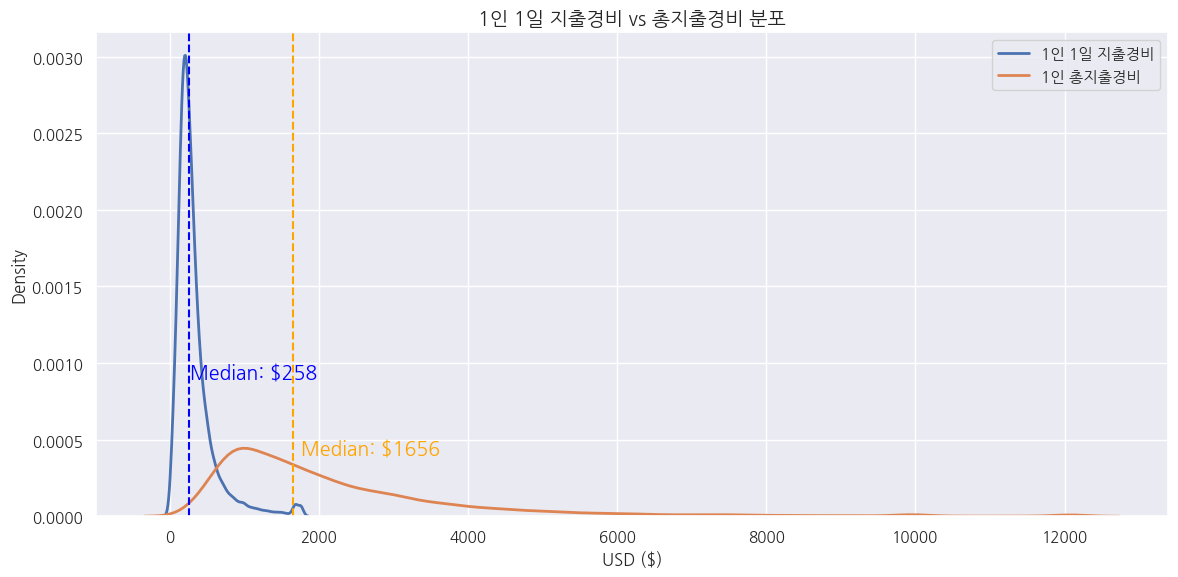

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# KDE plot
sns.kdeplot(data=data, x='1인1일지출경비', label='1인 1일 지출경비', linewidth=2)
sns.kdeplot(data=data, x='1인지출경비', label='1인 총지출경비', linewidth=2)

# 중앙값 계산
median_1day = data['1인1일지출경비'].median()
median_total = data['1인지출경비'].median()

# 중앙값 선 그리기
plt.axvline(median_1day, color='blue', linestyle='--', linewidth=1.5)
plt.axvline(median_total, color='orange', linestyle='--', linewidth=1.5)

# 중앙값 텍스트 표시
plt.text(median_1day + 20, 0.0009, f'Median: ${median_1day:.0f}', color='blue')
plt.text(median_total + 100, 0.0004, f'Median: ${median_total:.0f}', color='orange')

# 시각화 설정
plt.title('1인 1일 지출경비 vs 총지출경비 분포', fontsize=14)
plt.xlabel('USD ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()